# Hypothesis Testing

The goal of hypothesis testing is to determine whether observed effects that we see in a sample are likely to also appear in the larger population or whether it is likely that those were just due to the randomness inherent in taking a sample.

We will be trying to answer “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?”

Since we are only looking at a sample of the population, if we calculate statistics from this sample, we are unlikely to get the same values as the corresponding population parameters.

In [1]:
import pandas as pd
import numpy as np

Let's take a sample of size 25 from a standard normal distribution. That is, a normal distribution with mean 0 and standard deviation 1.

In [2]:
np.random.seed(123)
normal_sample = np.random.normal(loc = 0, size = 25)

In [3]:
normal_sample.mean()

0.1401027900713418

Notice that even though our sample came from a population with mean 0, the sample mean was not zero. This apparent difference is due only to chance.

In [4]:
normal_sample = np.random.normal(loc = 0, size = 25)
normal_sample.mean()

-0.11355990790377175

If we take a different sample, we get a different sample mean, also not equal to zero and this time negative.

## Hypothesis Testing Setup:

We are trying to determine if an effect is due to actual differences at the population level, or if the observed differences that we see are just random noise. We do this, but giving random noise the benefit of the doubt. We tend to see patterns when what we are looking at is noise, so we start by assuming that what we see is just due to random noise. This assumption is called the null hypothesis.

Null Hypothesis ($H_0$): There is no difference

In order to conclude that there is an effect, we need to gather enough evidence to overcome the assumption of no effect.

Alternative Hypothesis ($H_A$): There is a difference

What we do is to see, under the assumption of the null hypothesis, how (un)likely it is to see an effect at least as large as the one we observed on the data. If our data is extremely unlikely (the usualy threshold is set at 5% or less likely), then we reject the null hypothesis in favor of the alternative hypothesis.

## Type 1 and Type 2 Errors

Why do we do hypothesis testing in this way? We don't want to conclude that there is an effect when there is not (avoiding false positives / type 1 errors).

In the philosophy of hypothesis testing, the null hypothesis is "innocent until proven guilty". 

We need enough evidence to reject the innocence of the null hypothesis.

Before you collect your data, you decide on some small probability $\alpha$ (usually 0.05 or 0.01) that will be your threshold for rejecting the null. 

How do we weight the evidence? By seeing how likely the data that we observed is, if the null is actually true. If the probability of the observed data is less than the threshold, we reject the null hypothesis.

Important note: we never formally “accept” or “prove” the null hypothesis - we either reject or fail to reject it.

Type 1 error: rejecting the null when the null is actually true (convicting an innocent man)

Type 2 error: failing to reject the null when the alternative is true (letting a guilty man go free)

We will start by looking at what is known as "classical hypothesis testing", or what is sometimes referred to as Neyman-Pearson hypothesis testing.

The American Time Use Survey (ATUS) measures the amount of time people spend doing various activities, such as paid work, childcare, volunteering, and socializing. Based on this survey, Americans reported that on average, they spend 527 minutes sleeping.

We think that perhaps people who are unemployed will spend more time on average sleeping. To try and determine if this is true, we have a sample of the amount of time spent sleeping as reported by 20 unemployed participants contained in the `time_use_sample.csv` file.

In [24]:
time_use_sample = pd.read_csv('../data/time_use_sample.csv')

In [25]:
time_use_sample.head()

,participant_id,minutes_spent_sleeping
0,20180101180006,480
1,20180101180021,450
2,20180101180025,845
3,20180101180054,615
4,20180101180096,480


Let's take a look at the distribution of reported sleeping times.

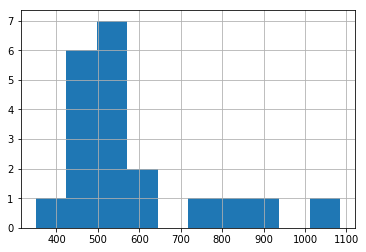

In [26]:
time_use_sample.minutes_spent_sleeping.hist();

The overall distribution is slightly skewed to the right, but looks close enough to normal that we should be okay in using a $t$-test.

In [27]:
time_use_sample.describe()

,participant_id,minutes_spent_sleeping
count,2.000000e+01,20.00000
mean,2.018010e+13,582.50000
std,3.136922e+02,176.33864
min,2.018010e+13,350.00000
25%,2.018010e+13,480.00000
50%,2.018010e+13,540.00000
75%,2.018010e+13,588.75000
max,2.018010e+13,1085.00000


On average, in this sample, people reported sleeping for an average of 582.5 minutes, but there was quite a bit of variability, with the standard deviation being 176 minutes.

Our sample mean was significantly higher (by almost an hour) than the overall average of 527 minutes. However, the high variability of the responses suggests that this difference may be due to sampling error and because of a true difference in the population.

First, let's establish our null and alternative hypotheses. We're trying to determine if unemployed people get more sleep on average than the general population, so we'll start by assuming that they do not. That is the average amount of sleep for the unemployed population is equal to 527 minutes.

$H_0: \mu = 527$

For our alternative hypothesis, we want to see if the average is higher for unemployed people.

$H_A: \mu > 527$

This is a **one-tailed** test, since we are only interested in testing is the average is greater than 527, rather than if it is not equal to 527.


In [28]:
from scipy.stats import ttest_1samp

This will report a calculated $t$-statistic along with a $p$-value. This $p$-value says how likely, under the assumption of the null hypothesis, we would be to see an observed sample mean at least as extreme as the one observed in our sample.

TODO: Mention significance level here.

Warning - the function `ttest_1samp` does only two-sided tests. This means that we are checking whether the mean is not equal to the proposed population mean. By symmetry of $t$-distributions, we can adjust by cutting the reported $p$-value in half.

In [29]:
t_result = ttest_1samp(time_use_sample.minutes_spent_sleeping, popmean = 527)
t_result

Ttest_1sampResult(statistic=1.4075391880717358, pvalue=0.1754177339719552)

What does this mean? Well, first we must divide the reported $p$-value in half since we are conducting a one-sided test.

In [30]:
t_result.pvalue / 2

0.0877088669859776

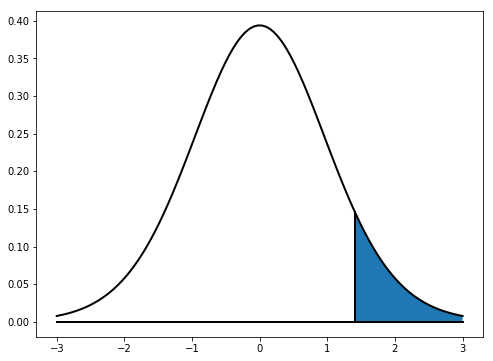

In [31]:
## TODO: Add annotations.

t_dist = t(df = len(time_use_sample))
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, t_dist.pdf(x), 'k-', lw=2, label = 't-distribution')

ax.fill_between(x[x >= t_result.statistic], 0, t_dist.pdf(x[x >= t_result.statistic]))

plt.plot([t_result.statistic, t_result.statistic], [0,t_dist.pdf(t_result.statistic)], color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2);

Based on the results of this test, we see that, even if the true mean is only 527, we will see a sample mean of at least 582.5 8.77% of the time. 

The standard is to only reject the null hypothesis if there is less than a 5% chance of the sample mean being as large as it was. In this case, we do not have enough evidence to  reject to conclude that unemployed people get more sleep than the general population.

Let's try to understand why, even though there was such large difference (almost an hour), we were not able to conclude that this difference really exists. It has to do with two factors:

* First, we had a very large sample standard deviation (120 minutes). When there is a lot of variability in the population, we get a wider sampling distribution, meaning that is it more likely for a given sample mean to be much different from the population mean.

* Second, we have a small sample size. The sampling distribution of the mean's variance is inversely proportional to the sample size, so a small sample size results in a large variance in the sampling distribution, and hence, more likelihood of sample means far from the population mean.

Let's repeat this analysis, but this time with a larger sample size.

In [32]:
time_use_sample = pd.read_csv('../data/time_use_sample_b.csv')

In [33]:
time_use_sample.minutes_spent_sleeping.describe()

count    1000.000000
mean      539.354000
std       149.885391
min         0.000000
25%       450.000000
50%       540.000000
75%       615.000000
max      1350.000000
Name: minutes_spent_sleeping, dtype: float64

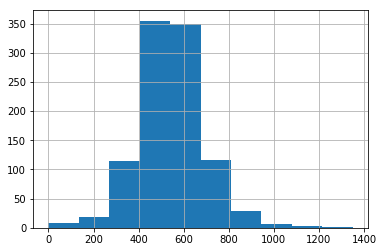

In [34]:
time_use_sample.minutes_spent_sleeping.hist();

In [35]:
t_result = ttest_1samp(time_use_sample.minutes_spent_sleeping, popmean = 527)
t_result

Ttest_1sampResult(statistic=2.606443367042204, pvalue=0.009285015789459897)

In [36]:
t_result.pvalue / 2

0.004642507894729949

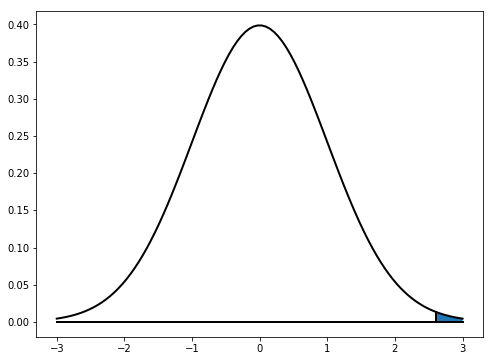

In [37]:
## TODO: Add annotations.

t_dist = t(df = len(time_use_sample))
x = np.linspace(-3, 3, 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(x, t_dist.pdf(x), 'k-', lw=2, label = 't-distribution')


x = np.linspace(t_result.statistic, 3, 20)
ax.fill_between(x, 0, t_dist.pdf(x))

plt.plot([t_result.statistic, t_result.statistic], [0,t_dist.pdf(t_result.statistic)], 
         color = 'black', linewidth = 2);

plt.plot([-3, 3], [0,0], color = 'black', linewidth = 2);

This time, we still have a very large sample standard deviation, but our sample size is so large, that the sampling distribution will have much lower variance.

The $p$-value that we get shows that, if unemployed people slept on average for 527 minutes, there would only be a 0.5% chance of observing a sample mean at least as large as the one that we observed.

This means that we can reject the null hypothesis in favor of the alternative hypothesis.

## Two-Sample Tests

Oftentimes, we will be testing to see if there is a difference between two populations. For example, we might want to compare amount of time spent sleeping by the male population vs the female population from the American Time Use Survey.

In [38]:
sleeping = pd.read_csv('../data/atus_sleeping.csv')

First, we can look at some summary statistics.

In [39]:
sleeping.groupby('sex').describe()

participant_id                                                          \
                count          mean           std           min           25%   
sex                                                                             
Female           25.0  2.018058e+13  3.362890e+08  2.018011e+13  2.018030e+13   
Male             25.0  2.018072e+13  4.157344e+08  2.018010e+13  2.018030e+13   

                                                 minutes_spent_sleeping  \
                 50%           75%           max                  count   
sex                                                                       
Female  2.018050e+13  2.018081e+13  2.018121e+13                   25.0   
Male    2.018081e+13  2.018111e+13  2.018121e+13                   25.0   

                                                                
          mean         std    min    25%    50%    75%     max  
sex                                                             
Female  582.32  127.678868  330.0  500.0  584.0  660.0   955.0  
Male    519.60  169.033774  270.0  420.0  485.0  629.0  1030.0

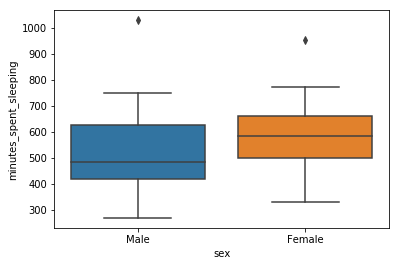

In [40]:
sns.boxplot(data = sleeping, x = 'sex', y = 'minutes_spent_sleeping');

We also need to look at our data to  ensure that it looks reasonably normally distributed.

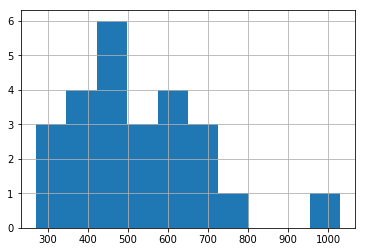

In [41]:
sleeping.loc[sleeping.sex == 'Male', 'minutes_spent_sleeping'].hist();

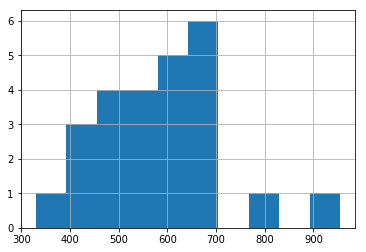

In [42]:
sleeping.loc[sleeping.sex == 'Female', 'minutes_spent_sleeping'].hist();

There does appear to be a difference between males and females in terms of the amount of time spent sleeping. However, there is quite a bit of variability in our datasets, so we need to check to see how likely the difference that we observe is due simply to the randomness inherent in sampling.

First, let's set up our null and alternative hypotheses. Remember that the null hypothesis says that there is no difference between the population means. Let $\mu_M$ represent the average time spent sleeping by males and $\mu_F$ represent the average time spent sleeping by females.

**Null Hypothesis:**

$H_0: \mu_M = \mu_F$

**Alternative Hypothesis:**

$H_A: \mu_M \neq \mu_F$

In [43]:
from scipy.stats import ttest_ind

When performing a 2-sample $t$-test, we have to decide whether we think that the two populations have equal variance. If not, we will do a modification, called the Welch's $t$-test. Based on our samples, it appears that the male times have more variance than the female times, so to be on the safe side, we'll assume unequal variances. We need to tell our function that we do not belive that the populations have equal variance. We do this by specifying the argument equal_var = False.

http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html

In [44]:
t_results = ttest_ind(sleeping.loc[sleeping.sex == 'Male', 'minutes_spent_sleeping'],
                      sleeping.loc[sleeping.sex == 'Female', 'minutes_spent_sleeping'],
                     equal_var = False)
t_results

Ttest_indResult(statistic=-1.4803934746073193, pvalue=0.14578885880640693)

What this tells us is that if the hypothesis that there is no difference between the population means is true, then we would only see a difference at least as large as the one we observed in our dataset 14.58% of the time. This does not meet the 5% threshold, so based on our sample we cannot conclude that there is a statistically significant difference between the average number of minutes spent sleeping between males and females.

## Non-Parametric Tests

Using either a $t$-test of a $z$-test require us to assume that our observations come from a distribution which is approximately normal. But what if this is not true?

We can use a non-parametric test. Eg. Wilcoxon signed-rank test

See http://faculty.washington.edu/yenchic/18W_425/Lec1_TwoSample.pdf

In [45]:
grooming = pd.read_csv('../data/atus_grooming.csv')

In [46]:
grooming.groupby('sex').describe()

participant_id                                                          \
                count          mean           std           min           25%   
sex                                                                             
Female           25.0  2.018073e+13  3.290466e+08  2.018011e+13  2.018040e+13   
Male             25.0  2.018070e+13  3.310938e+08  2.018011e+13  2.018040e+13   

                                                 minutes_spent_grooming  \
                 50%           75%           max                  count   
sex                                                                       
Female  2.018071e+13  2.018101e+13  2.018121e+13                   25.0   
Male    2.018081e+13  2.018091e+13  2.018121e+13                   25.0   

                                                        
         mean        std  min   25%   50%   75%    max  
sex                                                     
Female  38.76  31.620510  0.0  18.0  30.0  60.0  125.0  
Male    18.08  19.805134  0.0   0.0  15.0  31.0   60.0

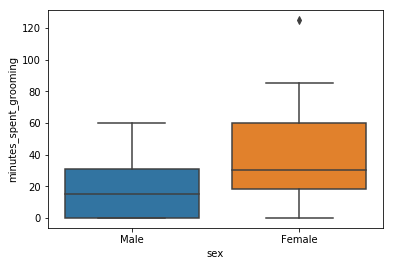

In [47]:
sns.boxplot(data = grooming, x = 'sex', y = 'minutes_spent_grooming');

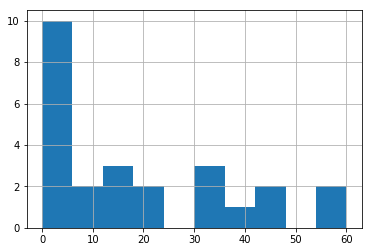

In [48]:
grooming.loc[grooming.sex == 'Male', 'minutes_spent_grooming'].hist();

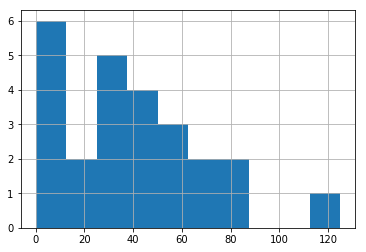

In [49]:
grooming.loc[grooming.sex == 'Female', 'minutes_spent_grooming'].hist();

Neither of these distributions look normal. Therefore, it is better to use a non-parametric method. These non-parametric methods relax some of the distributional assumptions about our datasets.

These methods are normally based on evaluating the ranks, rather than the actual values.

We are not testing whether the average time spent grooming is equal, but instead that the distributions are the same.

Here, we will be using the Mann–Whitney U test.

**Null Hypothesis:**

Let $m$ be the number of minutes spent on grooming by randomly chosen male and $f$ be the number of minutes spent on grooming by a randomly chosen female.

$H_0: P(m < f) = \frac{1}{2}$

$H_A: P(m < f) > \frac{1}{2}$

In [50]:
from scipy.stats import mannwhitneyu

For this test, we can specify the direction of our test. Since we are hypothesizing that 

In [51]:
mwu_results = mannwhitneyu(grooming.loc[grooming.sex == 'Male', 'minutes_spent_grooming'],
                      grooming.loc[grooming.sex == 'Female', 'minutes_spent_grooming'], alternative = "less")
mwu_results

MannwhitneyuResult(statistic=186.5, pvalue=0.006701639259529442)

Based on the results of this test, we reject the null hypothesis in favor of the alternative hypothesis that for a randomly chosen male and female, it is more likely that the female spends more time on grooming than the male.

## Power Calculations

https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

The hypothesis testing setup we have looked at so far has been designed to avoid Type 1 (false positive) errors. Minimizing the chance of a type 1 error comes at the expense of increasing the chance of a Type 2 error (false negative). That is, we increase the likelihood of concluding that there is no effect, when in reality there is an effect.

The statistical **power** of a test is the probability of detecting an effect, when there is one to detect.

It is the same as 1 - (Probability of Type 2 Error).

If we know the approximate effect size and the desired significance level, we can estimate the sample size needed to reject the null hypothesis.

Effect size: Cohen's $d$

Cohen's $d$ is the difference between the population means divided by their pooled standard deviation. It is a way to standardize the difference.

General Rule of Thumb:
* Small effect = 0.2
* Medium Effect = 0.5
* Large Effect = 0.8

We will need a larger sample size to detech small effects compared to large effects.


Power calculations: 4 parts
* Sample size
* Effect size
* Significance level
* Power

In [52]:
from statsmodels.stats.power import tt_ind_solve_power

For this function, we pass in three of the arguments and it returns the fourth.

For example, if we think that the effect we are trying to detect is medium (so effect_size of 0.5), and we want at least an 80\% chance of detecting the effect at a significance level of 0.05, we pass in the following arguments.

In [53]:
tt_ind_solve_power(effect_size = 0.5, alpha = 0.05, power = 0.8)

63.765611775409525

On the other hand, if we want to be 99\% sure of detecting the difference, we set power = 0.99, and see that we need a larger sample size.

In [54]:
tt_ind_solve_power(effect_size = 0.5, alpha = 0.05, power = 0.99)

147.94788668637267

If we think that the effect size is much smaller (say, only 0.1), and we still want a 99\% chance of detecting it, we need a much much larger sample.

https://online.stat.psu.edu/stat414/node/304/

In [55]:
tt_ind_solve_power(effect_size = 0.1, alpha = 0.05, power = 0.99)

3675.45516588971

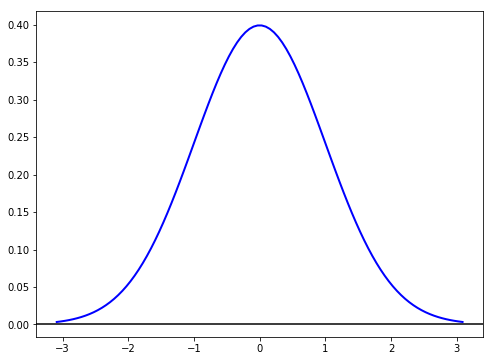

In [58]:
normal_dist = stats.norm()
x = np.linspace(stats.norm.ppf(0.001),
                 stats.norm.ppf(0.999), 100)
fig, ax = plt.subplots(1, 1, figsize = (8,6))
ax.plot(x, normal_dist.pdf(x), 'k-', lw=2, label='normal pdf', color = 'blue')
plt.axhline(y = 0, color = 'black');

## Hypothesis Testing for Proportion

We can not only test a hypothesis about a mean, but also about a proportion. Let's look at the squirrel census data again.

In [4]:
squirrels = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')

In [7]:
squirrels = squirrels[~squirrels['Primary Fur Color'].isna()]

squirrels['Black'] = squirrels['Primary Fur Color'] == 'Black'

In [9]:
squirrels[['Primary Fur Color', 'Black']]

,Primary Fur Color,Black
1,Gray,False
2,Cinnamon,False
3,Gray,False
5,Gray,False
6,Gray,False
...,...,...
3018,Gray,False
3019,Gray,False
3020,Gray,False
3021,Gray,False


In [25]:
ct = pd.crosstab(squirrels['Runs from'], squirrels['Black'], margins = True)
ct

Black,False,True,All
Runs from,,,
False,2227,71,2298
True,638,32,670
All,2865,103,2968


In [2]:
from statsmodels.stats.proportion import proportions_ztest

In [37]:
# or we can use the implementation from statsmodels
# where we pass in the success (they call the argument counts)
# and the total number for each group (they call the argument nobs,
# number of observations)
counts = np.array([ct.loc[True, False], ct.loc[True, True]])
nobs = np.array([ct.loc['All',False], ct.loc['All', True]])

zscore, pvalue = proportions_ztest(counts, nobs, alternative = 'smaller')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -2.099, pvalue = 0.018
